## This notebook is used for analyzing how changes to the match rewward and mismatch and indel penalites alter the construction of the represenative subset

In [1]:
import os
import time
import math
from representative_subset import greedy_representative_subset, greedy_representative_subset_v2, global_alignment_score, score
from data_io import parse_fasta, write_fasta
from alignment_viewer import view_alignment
import random
from Bio import AlignIO, SeqIO
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
datasets_folder = './data'
aligned_datasets = {
    'H1N1': 'H1N1_Aligned.fasta',
    'H3N2': 'H3N2_Aligned.fasta',
    'H5N1': 'H5N1_Aligned.fasta',
    'H9N2': 'H9N2_Aligned.fasta',
}

In [13]:
mrs = np.arange(1, 11, 1)
mps = np.arange(0, 11, 1)
ips = np.arange(0, 11, 1)
mr_mp_results = [[0]*11 for _ in range(10)]
mr_ip_results = [[0]*11 for _ in range(10)]
mp_ip_results = [[0]*11 for _ in range(11)]
input_path = os.path.join(datasets_folder, aligned_datasets["H1N1"])    
sequences = parse_fasta(input_path)
for m_r in mrs:
    for m_p in mps:
        subset = greedy_representative_subset(sequences, mr = m_r, mp = m_p)
        mr_mp_results[m_r-1][m_p] = len(subset)
    for i_p in ips:
        subset = greedy_representative_subset(sequences, mr = m_r, ip = i_p)
        mr_ip_results[m_r-1][i_p] = len(subset)
for m_p in mps:
    for i_p in ips:
        subset = greedy_representative_subset(sequences, mp = m_p, ip = i_p)
        mp_ip_results[m_p][i_p] = len(subset)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2028/2028 [00:00<00:00, 19361.85it/s]


## Visualize results with heatmap

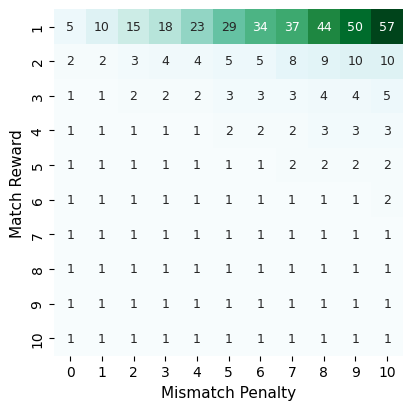

In [18]:
fig, ax = plt.subplots(figsize=(4.5,4.5))
df = pd.DataFrame(mr_mp_results, columns = range(0,11), index = range(1,11))
g = sns.heatmap(df, annot = True, fmt = '.3g', annot_kws={"size": 9}, cbar = None, cmap = "BuGn")
g.set_ylabel("Match Reward", fontsize = 11)
g.set_xlabel("Mismatch Penalty", fontsize = 11)
plt.show()

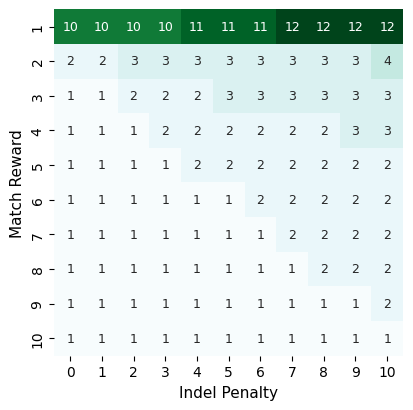

In [19]:
fig, ax = plt.subplots(figsize=(4.5,4.5))
df = pd.DataFrame(mr_ip_results, columns = range(0,11), index = range(1,11))
g = sns.heatmap(df, annot = True, fmt = '.3g', annot_kws={"size": 9}, cbar = None, cmap = "BuGn")
g.set_ylabel("Match Reward", fontsize = 11)
g.set_xlabel("Indel Penalty", fontsize = 11)
plt.show()

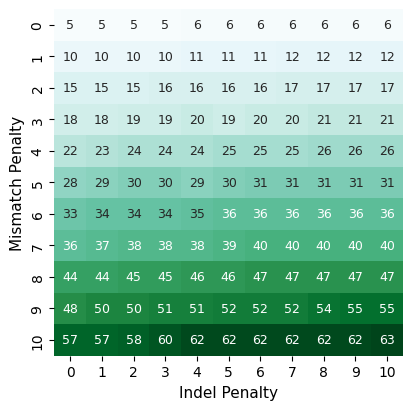

In [20]:
fig, ax = plt.subplots(figsize=(4.5,4.5))
df = pd.DataFrame(mp_ip_results, columns = range(0,11), index = range(0,11))
g = sns.heatmap(df, annot = True, fmt = '.3g', annot_kws={"size": 9}, cbar = None, cmap = "BuGn")
g.set_ylabel("Mismatch Penalty", fontsize = 11)
g.set_xlabel("Indel Penalty", fontsize = 11)
plt.show()

## Create a line plot

In [19]:
mrs = np.arange(1, 26, 1)
mps = np.arange(1, 26, 1)
ips = np.arange(1, 26, 1)
input_path = os.path.join(datasets_folder, aligned_datasets["H1N1"])    
sequences = parse_fasta(input_path)

subset_size_list = []
results = []
for m_r in mrs:
    subset = greedy_representative_subset(sequences, mr = m_r)
    subset_size_list.append(len(subset))
    results.append(m_r)
mr_results = [results, subset_size_list]

subset_size_list = []
results = []
for m_p in mps:
    subset = greedy_representative_subset(sequences, mp = m_p)
    subset_size_list.append(len(subset))
    results.append(m_p)
mp_results = [results, subset_size_list]
    
subset_size_list = []
results = []
for i_p in ips:
    subset = greedy_representative_subset(sequences, ip = i_p)
    subset_size_list.append(len(subset))
    results.append(i_p)
ip_results = [results, subset_size_list]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3060/3060 [00:01<00:00, 2779.29it/s]


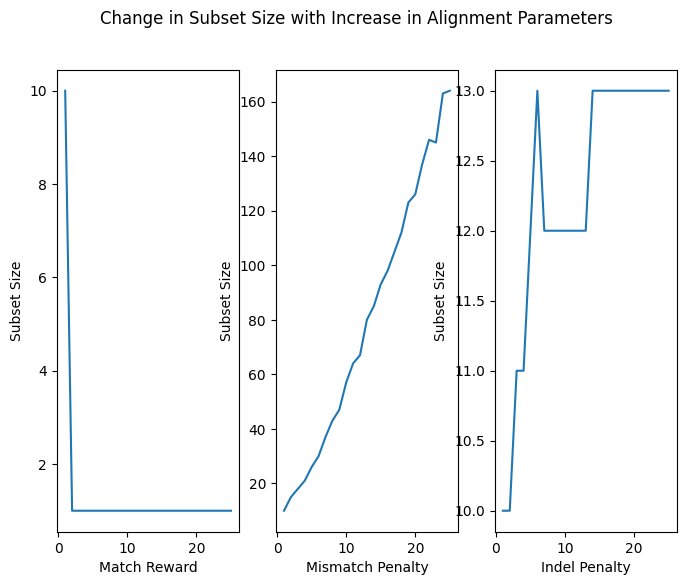

In [24]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (8,6))
ax1.plot(mr_results[0], mr_results[1])
ax1.set_xlabel("Match Reward")
ax1.set_ylabel("Subset Size")
ax2.plot(mp_results[0], mp_results[1])
ax2.set_xlabel("Mismatch Penalty")
ax2.set_ylabel("Subset Size")
ax3.plot(ip_results[0], ip_results[1])
ax3.set_xlabel("Indel Penalty")
ax3.set_ylabel("Subset Size")
fig.suptitle('Change in Subset Size with Increase in Alignment Parameters')
plt.show()